In [1]:
from mlchartist.array_builder import full_dataset_randomised_arrays_
from mlchartist.preprocessing import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
# Reads Nasdaq 100 components

nasdaq100 = pd.read_csv('../../raw_data/nasdaq100.csv', header=None)

In [6]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [7]:
# Samples n random companies from Nasdaq 100 list

rand_tickers = random.sample(nasdaq100_list, 100)

In [8]:
joined_df = pd.DataFrame()

# Takes nrows from history from each company from the sample
nrows = 3000

for ticker in rand_tickers:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)
    

In [9]:
# Prints sample tickers list

for tick in rand_tickers:
    print(tick)

TTWO
JD
NVDA
INTC
CHTR
BMRN
VRSN
VRSK
NTAP
LRCX
LULU
TSLA
JBHT
TCOM
DLTR
ALGN
BIIB
UAL
PEP
AMAT
CMCSA
BIDU
VRTX
CTXS
MDLZ
QCOM
AAPL
KLAC
XEL
EXPE
EA
MXIM
ORLY
MU
GOOG
INCY
IDXX
CDNS
CHKP
SWKS
COST
FB
CSCO
CSX
FISV
NTES
AMGN
KHC
AMZN
ADBE
ULTA
WDAY
GILD
CERN
NFLX
SBUX
MNST
MELI
ROST
ISRG
LBTYK
SNPS
AAL
MYL
CTSH
ALXN
INTU
MAR
PYPL
ADP
MSFT
BKNG
PCAR
EXC
GOOGL
CTAS
WBA
AMD
AVGO
HSIC
NXPI
WYNN
ILMN
FAST
REGN
PAYX
ADI
SIRI
MCHP
XLNX
ASML
ADSK
EBAY
NLOK
HAS
WDC
TMUS
ATVI
TXN
LBTYA


In [10]:
joined_df['date'] = pd.to_datetime(joined_df['date'])

FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024

# Drops 'ADI' and 'OBV' from input columns
# INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']


joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

In [11]:
joined_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,TTWO,2020-12-23,78.851486,85.083709,85.269541,1.690557e+08,274323883,5.412215,48.259043,38.540901,...,7.565017,0.029581,0.042662,0.010752,-0.000198,0.034338,0.098759,True,True,True
1,TTWO,2020-12-22,78.958937,85.232130,87.571920,1.690031e+08,275008344,5.558539,47.049841,40.412983,...,7.306904,0.022243,0.030467,0.013871,0.000446,0.036775,0.099455,True,True,True
2,TTWO,2020-12-21,78.898861,85.492782,85.150702,1.692043e+08,274302088,5.710734,45.513152,42.361789,...,6.982486,0.003370,-0.001189,0.018784,-0.007965,0.033658,0.100224,True,False,True
3,TTWO,2020-12-18,82.852798,91.990847,80.250017,1.690555e+08,275389744,5.677714,43.858257,45.885707,...,6.607004,-0.011161,0.006637,0.017995,0.030344,0.069292,0.125380,False,True,True
4,TTWO,2020-12-17,79.289256,77.968476,73.877289,1.668835e+08,270211287,5.465230,42.076063,39.527686,...,6.204556,0.025836,0.022543,0.006738,0.011685,0.051006,0.092056,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,LBTYA,2009-01-30,43.471332,2.850822,12.220664,1.329295e+08,49807162,0.504988,18.881574,16.388734,...,0.123256,0.026074,-0.026767,-0.181875,-0.049578,-0.032534,-0.175908,True,False,False
2996,LBTYA,2009-01-29,46.853563,9.166044,12.696115,1.369758e+08,54949401,0.502903,18.995625,17.722597,...,0.161253,-0.081539,-0.084799,-0.199614,-0.047236,-0.024809,-0.111820,False,False,False
2997,LBTYA,2009-01-28,50.502158,24.645125,13.374735,1.405269e+08,59244555,0.513734,20.046687,18.683489,...,0.195802,-0.106285,-0.144188,-0.228102,0.066275,-0.013481,-0.089932,False,False,False
2998,LBTYA,2009-01-27,45.297296,4.277176,6.381522,1.328464e+08,51563968,0.513998,21.178601,18.803840,...,0.230986,-0.025176,-0.082836,-0.166993,-0.022036,-0.032686,-0.151766,False,False,False


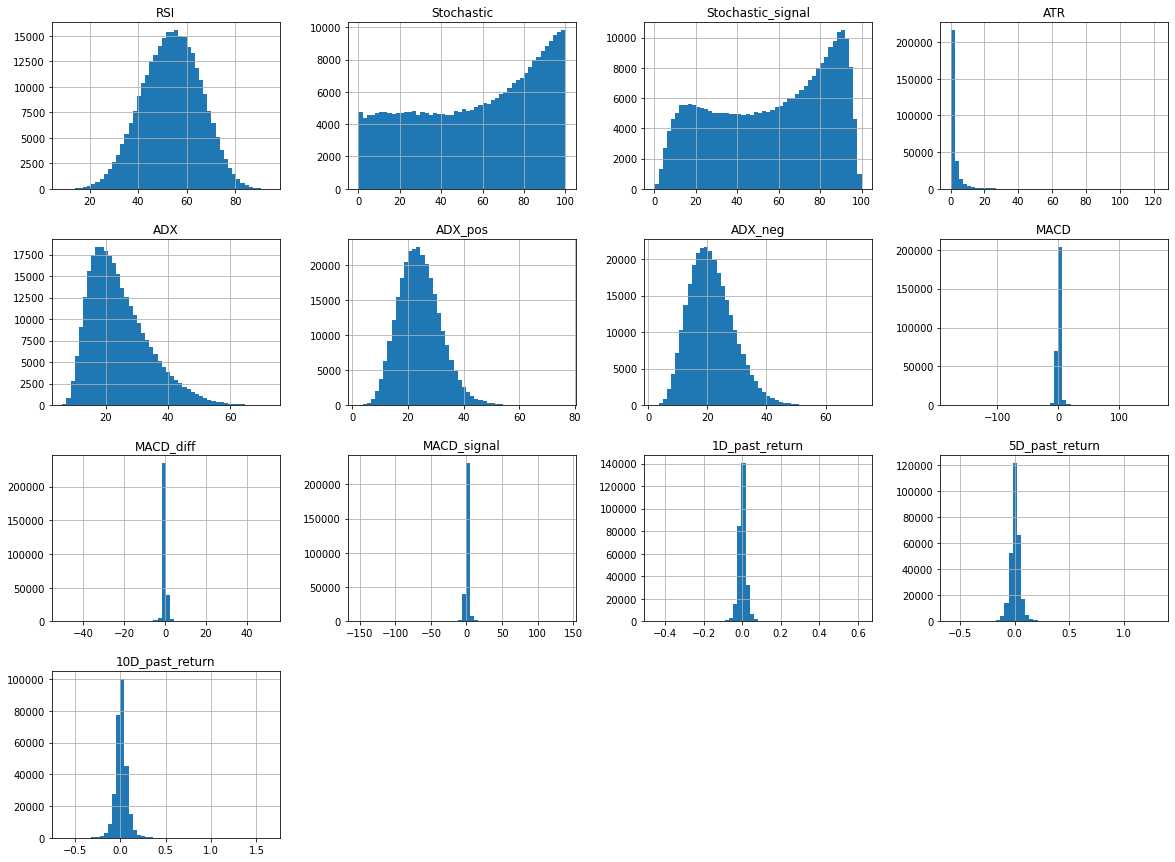

In [12]:
# Plots distribution of the input df without removing outliers

joined_df[INPUT_COLS].hist(figsize=(20, 15), bins=50)
plt.show()

In [13]:

TARGET_COLS=['10D_return_bin']
outlier_validation={'1D_past_return': [-0.3, 0.3]}

stride = 1


train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
                                                                                stride=stride, 
                                                                                input_cols=INPUT_COLS, 
                                                                                outlier_threshold=1, 
                                                                                outlier_validation=outlier_validation, 
                                                                                check_train_outliers=True,
                                                                                check_test_outliers=False, 
                                                                                target_col=TARGET_COLS, 
                                                                                time_window=30,
                                                                                test_set_size='2Y')

print('')
print('')
print('### Stats ###')
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)
print('scaler', scaler)

print('')
print('')
print('### Validation ###')


100 Companies in Dataset
Starting TTWO: Company 1 of 100
Starting JD: Company 2 of 100
Starting NVDA: Company 3 of 100
Starting INTC: Company 4 of 100
Starting CHTR: Company 5 of 100
Starting BMRN: Company 6 of 100
Starting VRSN: Company 7 of 100
Starting VRSK: Company 8 of 100
Starting NTAP: Company 9 of 100
Starting LRCX: Company 10 of 100
Starting LUL: Company 11 of 100
Starting TSLA: Company 12 of 100
Starting JBHT: Company 13 of 100
Starting TCOM: Company 14 of 100
Starting DLTR: Company 15 of 100
Starting ALGN: Company 16 of 100
Starting BIIB: Company 17 of 100
Starting UAL: Company 18 of 100
Starting PEP: Company 19 of 100
Starting AMAT: Company 20 of 100
Starting CMCSA: Company 21 of 100
Starting BID: Company 22 of 100
Starting VRTX: Company 23 of 100
Starting CTX: Company 24 of 100
Starting MDLZ: Company 25 of 100
Starting QCOM: Company 26 of 100
Starting AAPL: Company 27 of 100
Starting KLAC: Company 28 of 100
Starting XEL: Company 29 of 100
Starting EXPE: Company 30 of 100
S

In [15]:
test_x.shape

(47053, 30, 13)

In [18]:
import joblib
joblib.dump(scaler, '../../models/scaler')

['../../models/scaler']

In [27]:
pd.DataFrame(test_x[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.016401,-0.874934,-0.739068,-0.208970,0.821380,0.007051,-0.350340,0.332412,-0.671819,0.554194,1.377613,-1.395183,-1.282980
1,-0.205345,-0.961578,-0.460130,-0.202143,0.926581,0.145563,-0.250350,0.399062,-0.604353,0.604208,-2.109138,-2.124687,-2.027810
2,0.111984,-0.250917,-0.109934,-0.203383,1.039874,0.225393,-0.107166,0.506547,-0.377392,0.649119,-1.375477,-0.908964,-1.135201
3,0.342994,-0.089867,-0.003865,-0.205435,1.175355,0.435579,-0.564080,0.587044,-0.187955,0.676865,-0.969292,-0.813167,-0.028958
4,0.513326,0.024047,0.065918,-0.191892,1.220551,0.553826,-0.795083,0.647733,-0.020344,0.690285,-0.234166,-1.589074,0.552395
5,0.547964,0.047615,0.051961,-0.171220,1.212582,0.632232,-0.761310,0.691291,0.129338,0.691028,-0.516325,-0.493836,1.957834
6,0.630949,0.106536,0.121542,-0.153254,1.203999,0.736990,-0.716185,0.729668,0.298342,0.680450,0.952577,-0.891841,2.849943
7,0.537226,-0.015234,0.278438,-0.149660,1.194756,0.947578,-1.011912,0.754096,0.460880,0.657091,-1.144498,-0.767309,2.692583
8,0.719753,0.243449,0.388858,-0.154024,1.108250,1.232793,-1.020206,0.794998,0.721591,0.621439,-2.846343,0.791603,2.013682
9,1.264470,0.548120,0.513984,-0.160514,0.995297,1.561133,-0.926481,0.806643,0.945290,0.566069,2.551529,2.557197,3.038532


In [21]:
train_x.shape

(234347, 30, 13)

In [353]:
import random

# Samples n rows of train_x

indx = list(range(len(train_x)))
sample_indx = random.sample(indx, 150000)
X_train_sample =  train_x[[sample_indx], :][0]
y_train_sample = train_y[[sample_indx]]

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [22]:
y_train_sample.shape

NameError: name 'y_train_sample' is not defined

In [34]:
import joblib

joblib.dump(test_x, '../../models/test_x')
joblib.dump(test_y, '../../models/test_y')

['../../models/test_y']

In [358]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax

optim = RMSprop(learning_rate=0.0001)
precision = Precision()

def init_model():
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.001)
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(30,13), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [359]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(train_x, train_y, 
          epochs=500, 
          batch_size=16,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/500
11718/11718 [==============================] - 100s 9ms/step - loss: 1.1242 - precision_24: 0.5650 - accuracy: 0.5619 - val_loss: 0.6931 - val_precision_24: 0.5659 - val_accuracy: 0.5659
Epoch 2/500
11718/11718 [==============================] - 104s 9ms/step - loss: 0.6912 - precision_24: 0.5646 - accuracy: 0.5646 - val_loss: 0.6901 - val_precision_24: 0.5659 - val_accuracy: 0.5659
Epoch 3/500
11718/11718 [==============================] - 110s 9ms/step - loss: 0.6904 - precision_24: 0.5646 - accuracy: 0.5646 - val_loss: 0.6896 - val_precision_24: 0.5659 - val_accuracy: 0.5659
Epoch 4/500
11718/11718 [==============================] - 141s 12ms/step - loss: 0.6895 - precision_24: 0.5646 - accuracy: 0.5646 - val_loss: 0.6877 - val_precision_24: 0.5659 - val_accuracy: 0.5659
Epoch 5/500
11718/11718 [==============================] - 150s 13ms/step - loss: 0.6888 - precision_24: 0.5646 - accuracy: 0.5646 - val_loss: 0.6868 - val_precision_24: 0.5659 - val_accuracy: 0.5659
Epo

In [360]:
train_y.sum()/len(train_y)

0.5648504141294747

In [361]:
test_y.sum()/len(test_y)

0.5849148832167981

In [362]:
model.evaluate(test_x, test_y)

1471/1471 [==============================] - 6s 4ms/step - loss: 0.3339 - precision_24: 0.9329 - accuracy: 0.8828


[0.33388590812683105, 0.9329215288162231, 0.8828129768371582]

In [364]:
model.save('../../models/Nasdaq_100_150k')

INFO:tensorflow:Assets written to: ../../models/Nasdaq_100_150k/assets


In [1]:
from tensorflow.keras import models

In [2]:
model_n100 = models.load_model('../../models/Nasdaq_100_150k')

In [4]:
model_n100.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 30, 200)           171200    
_________________________________________________________________
lstm_47 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dropout_69 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dense_92 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_70 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 100)             

In [24]:
model_n100.evaluate(test_x, test_y)

1471/1471 [==============================] - 3s 2ms/step - loss: 0.3339 - precision_24: 0.9329 - accuracy: 0.8828


[0.3338858485221863, 0.9329215288162231, 0.8828129768371582]